### 1. Importing Essential Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import re
from bs4 import BeautifulSoup as bs
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [72]:
df_train=pd.read_csv("train.csv")
print(df_train.shape)

(3235, 6)


In [5]:
df_train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [73]:
df_test=pd.read_csv("test.csv")

### Dropping unnecessary column

In [74]:
unnecessary_col=['original_author','lang','retweet_count']
df_train=df_train.drop(columns=unnecessary_col,axis=1)
df_test=df_test.drop(columns=unnecessary_col,axis=1)

In [75]:
df_test.shape

(1387, 2)

In [297]:
X_train=df_train.values[:,1:-1]
Y_train=df_train.values[:,-1]
Y_train=np.array(Y_train,dtype='float32')

In [77]:
X_train.shape

(3235, 1)

In [78]:
Y_train.shape

(3235,)

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3235 non-null   float64
 1   original_text    3235 non-null   object 
 2   sentiment_class  3235 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 75.9+ KB


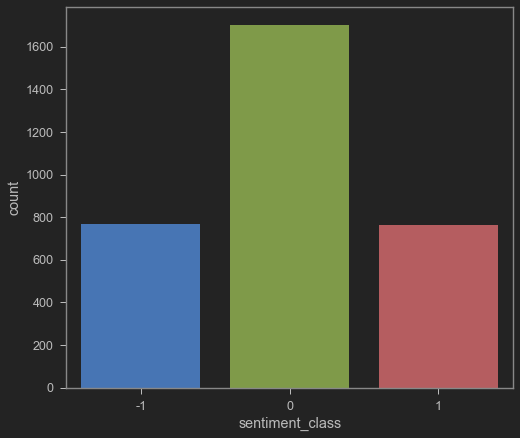

In [26]:
sns.countplot(x=df_train['sentiment_class']);

### Number of sentiments of each class

In [22]:
df_train.groupby('sentiment_class').size().sort_values(ascending=False)

sentiment_class
 0    1701
-1     769
 1     765
dtype: int64

In [92]:
X_train[0][0]

"Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus pic.twitter.com/va4nFjFQ5B"

### 2. Cleaning of data

In [169]:
def cleaning(text):
    no_html = bs(text).get_text()
    clean = re.sub("[^a-z\w\s]+", " ", no_html, flags=re.IGNORECASE)
    return re.sub("[0-9\s]+", " ", clean)
    

In [170]:
cleaning(X_train[8][0])

'To all the mothers grandmothers aunts sisters and women in our lives who care for and love us unconditionally Happy Mothers Day MothersDay pic twitter com ejatt aH z'

### 3. Stemming for reducing the size of vocabulary
### words like played - play , swimming - swim

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\scsur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [209]:
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [110]:
print(en_stopwords)

{'himself', 'no', 'you', 'some', "didn't", 'have', 'has', "weren't", "doesn't", 'itself', 'yours', 'those', 'doesn', 'under', 'are', 'for', 'below', 'this', 'down', 'same', 'after', 'will', 'with', 'haven', 'most', 'd', 'm', 'their', 'a', 'does', 'up', 'them', 'don', "shan't", 'why', 'i', 'isn', 't', 'our', 'above', 'so', 'until', 'by', 'herself', 'other', 'at', 'now', 'not', "wasn't", 'was', 'her', 'about', 'more', 'won', 'did', 'couldn', 'hadn', 'themselves', "hadn't", 'off', 'needn', 'its', "shouldn't", 'before', 'hasn', 'because', 's', "couldn't", 'how', 'been', 'if', 'ain', 'any', "you'd", 'own', "she's", 'but', 'all', 'just', 'him', 'from', 'as', 'weren', 'here', 'there', 'they', 'very', "mustn't", 'aren', "haven't", 'during', 'who', "aren't", 'to', "should've", "you've", 'while', 'an', 'wouldn', 'mightn', 'myself', 'having', "mightn't", 'your', 'then', "it's", 'y', "that'll", 'had', "don't", 'hers', 'in', 'on', 'me', 'the', "hasn't", 'shan', 'can', 'whom', 'that', 'when', 'which

In [210]:
en_stopwords.remove("no")
en_stopwords.remove("not")


In [211]:
def tokenize(text):
    clean_ = cleaning(text).lower()
    stemmed_tokens = [ps.stem(token) for token in clean_.split()]
    cl=[w for w in stemmed_tokens if not w in en_stopwords]
    return (" ".join(cl))

In [172]:
tokenize(X_train[2][0])

'happi mother day thi mother day work today quiet time reflect dog walk finish jigsaw garden learn guitar chord drunk strawberri gin tonic watch lee even dvd favourit place visit isol pic twitter com gz xvvf f'

### Tokenizing all data

In [212]:
clean_data=[]
for i in range(X_train.shape[0]):
    clean_data.append(tokenize(X_train[i][0]))

### Vectorizing our data

In [213]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [292]:
cv=CountVectorizer(ngram_range=(1,2))
#tfidf=TfidfVectorizer(ngram_range=(1,2))

In [293]:
X_vector=cv.fit_transform(clean_data) 
print(X_vector.shape)

(3235, 57264)


In [261]:
#X_vector=tfidf.fit_transform(clean_data) 

### Cleaning test data

In [294]:
X_test=df_test.values[:,1:]
cleaned_test_reviews=[tokenize(X_test[i][0]) for i in range(X_test.shape[0])]

### Vectorizing on Test cases

In [295]:
X_test_vector=cv.transform(cleaned_test_reviews)
#X_test_vector = tfidf.transform(cleaned_test_reviews)
print(X_test_vector.shape)

(1387, 57264)


In [296]:
mnb = MultinomialNB()
print(mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [298]:
mnb.fit(X_vector,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [299]:
predict=mnb.predict(X_test_vector)
Id=df_test['id']

In [300]:
dataframe=pd.DataFrame({"id":Id,"sentiment_class":predict})
dataframe.to_csv("submission.csv",index=False)

In [301]:
np.unique(predict,return_counts=True)

(array([-1.,  0.,  1.], dtype=float32), array([  11, 1364,   12], dtype=int64))

In [287]:
pred1=mnb.predict(X_)